In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<b><font size='6' color='red'>ch12. 데이터 시각화</font></b>
- 시간화 라이브러리 : matplotlib, seaborn, folium
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리, 판다스 내부에 포함
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능, groupby 기능을 추가한 라이브러리

# 1절 matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/pyplot_summary.html

## 1.1 패키지 import 및 기본 설정

In [1]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # 파일 저장시 해상도가 높은 retina로 설정

#한글설정

# warning 안보이게
import warnings
warnings.filterwarnings(action='ignore') # warning 안 보이게

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
 - 1) 데이터 준비
 - 2) 그래프 생성
 - 3) 그래프 함수로 그리기
 - 4) 그래프 커스터마이징
 - 5) 그래프 출력 및 저장

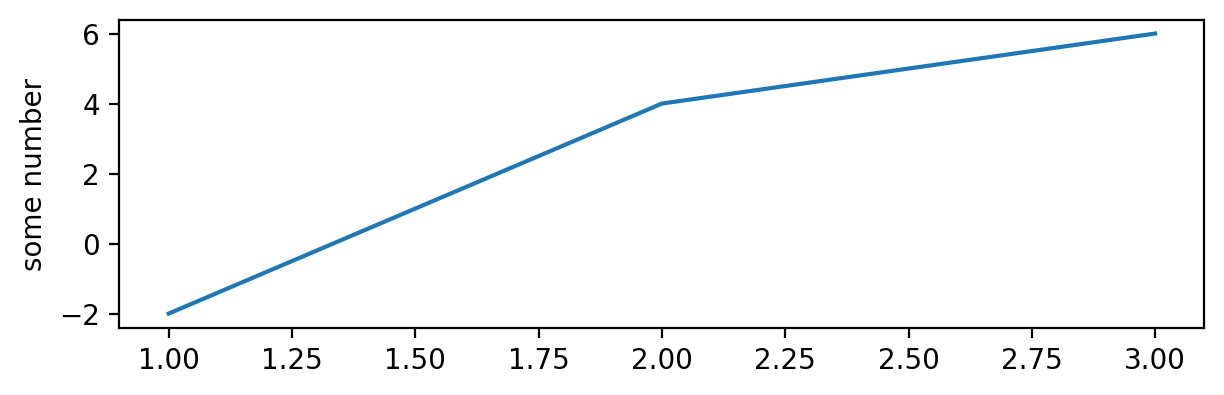

In [6]:
x = [1, 2, 3] #1)
y = [-2, 4, 6]
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성 사이즈는 인치
plt.plot(x,y) #3)
plt.ylabel('some number') # 4) 커스터마이징
#plt.show() # 5) 출력
plt.savefig('data/ch12.png', bbox_inches='tight') # 파일 출력

## 1.3 그래프 영역 나누기
### 1) subplot() 함수로 서브플롯 추가

In [9]:
import numpy as np
x = np.arange(0, 10, 0.1) #x = np.linspace(0, 9.9, 100)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

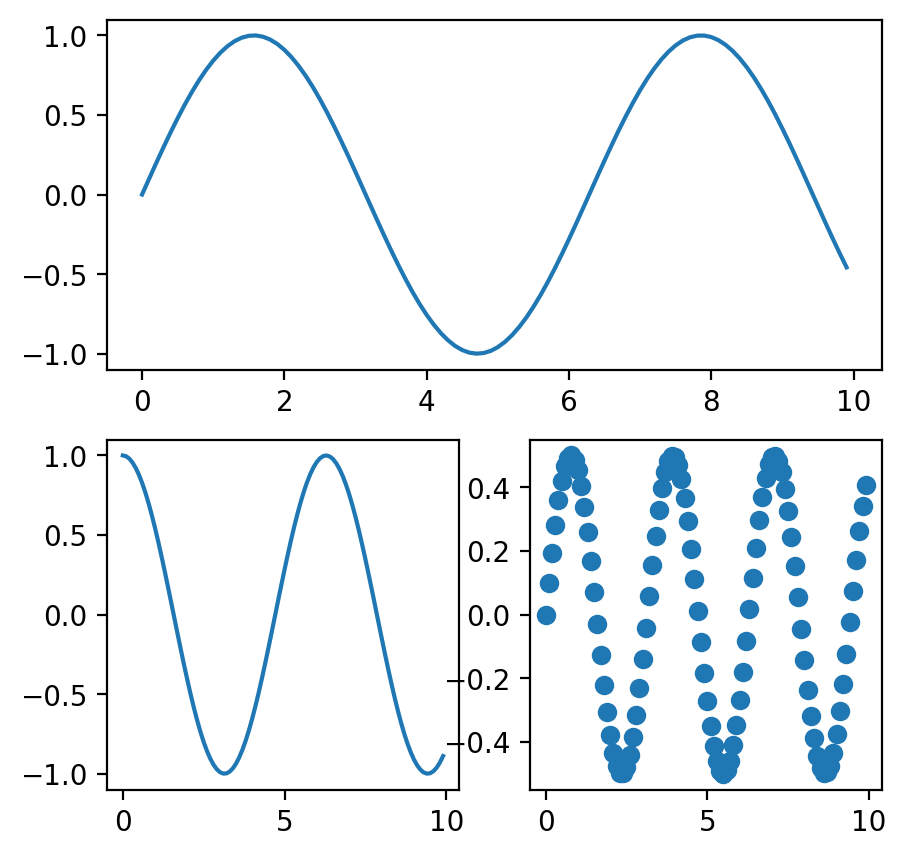

In [14]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1) # 2행 1열로 subplot에서 1번째 subplot은 다음과 같이 그린다
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) # 2행 2열 subplot 중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4) # 2행 2열 subplot 중 4번째 subplot
plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

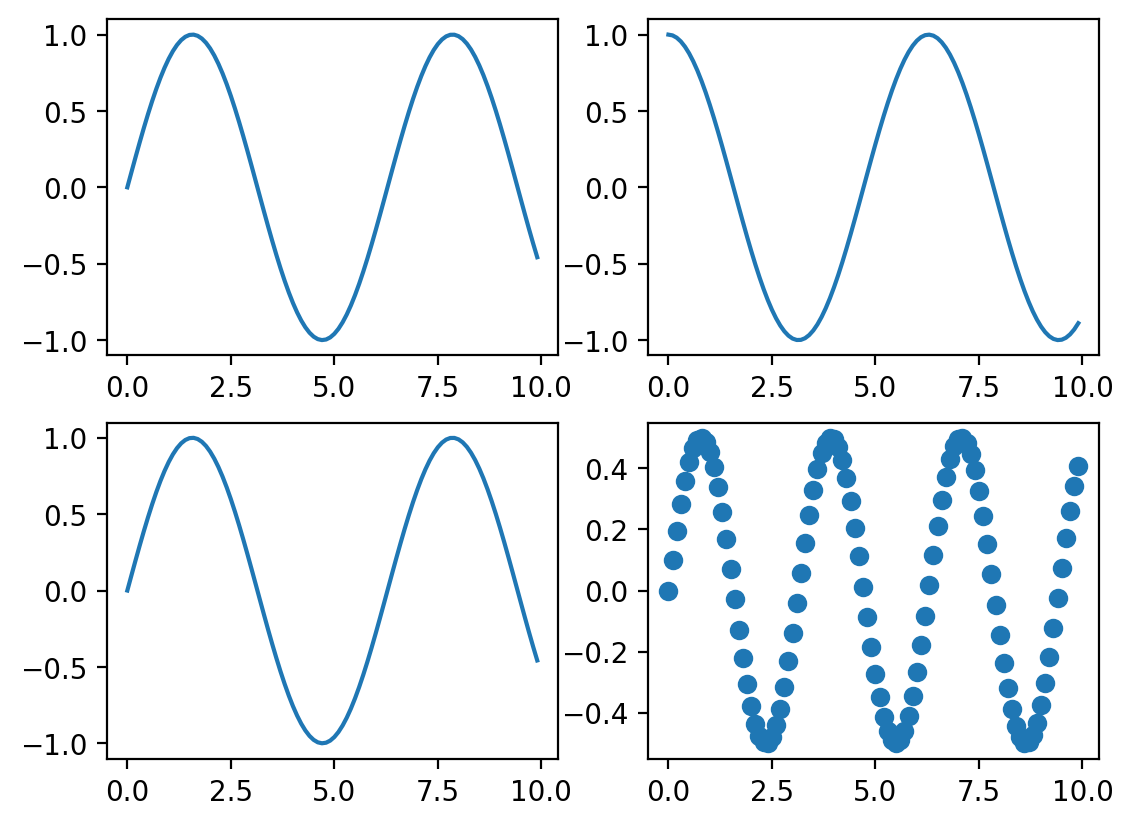

In [16]:
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 3); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 4); plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

### 2) subplots() 함수로 서브플롯 추가
- plot 함수에 색상이나 스타일 조정 (교한 14page) https://wikidocs.net/92085

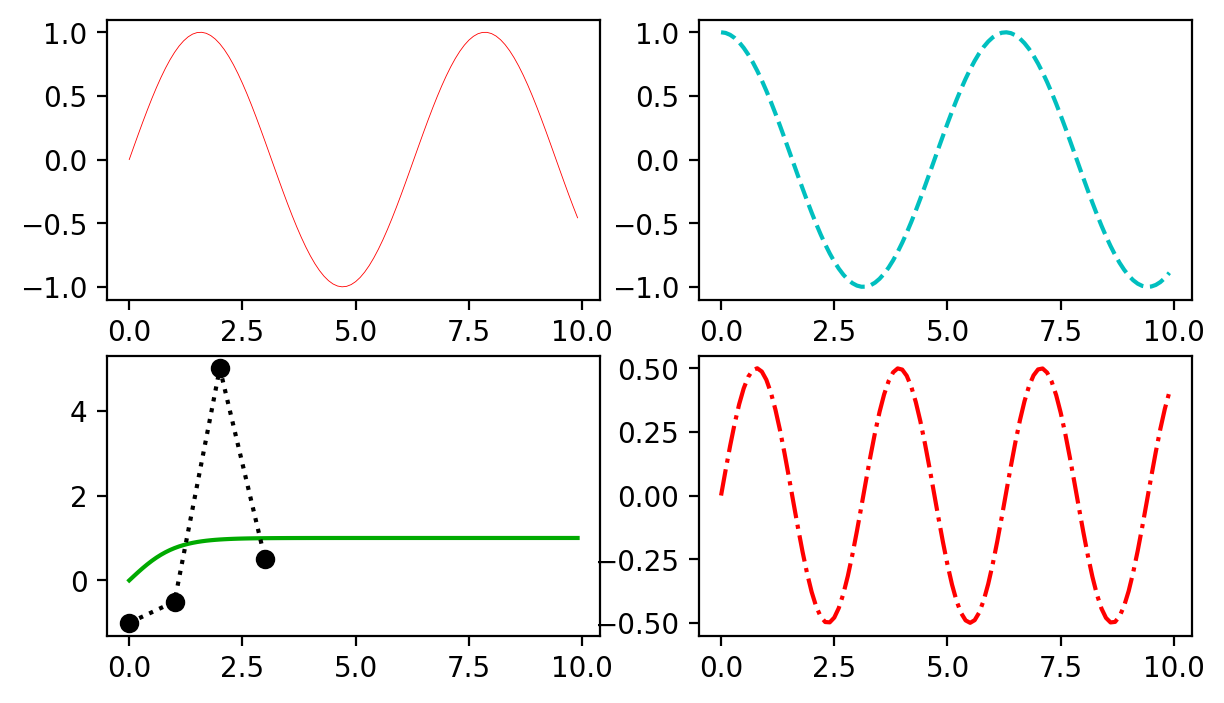

In [35]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), c='r', linewidth=0.3)
axes[0,1].plot(x, np.cos(x), 'c--') #c='c', linestyle = '--'
axes[1,0].plot(x, np.tanh(x), '#00AA00')
axes[1,0].plot([0,1,2,3], [-1, -0.5, 5, 0.5], 'ko:') #k:black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')
plt.show()

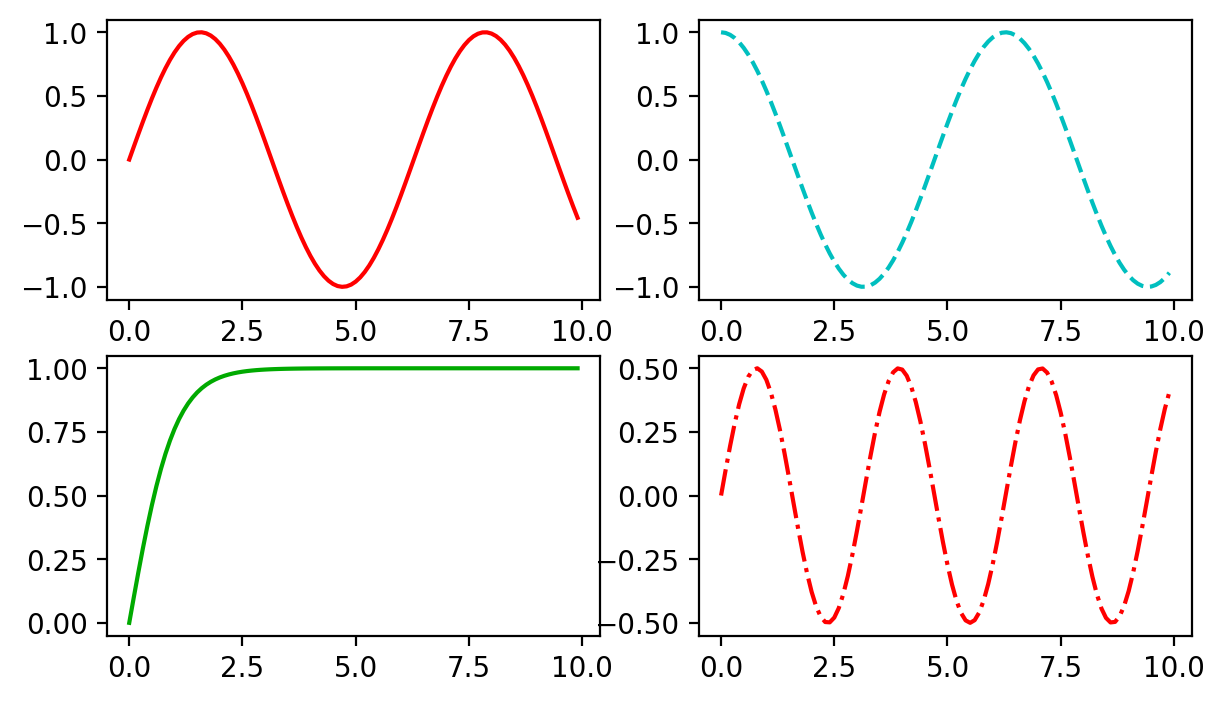

In [38]:
# 2행 2열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x), fmt[i])

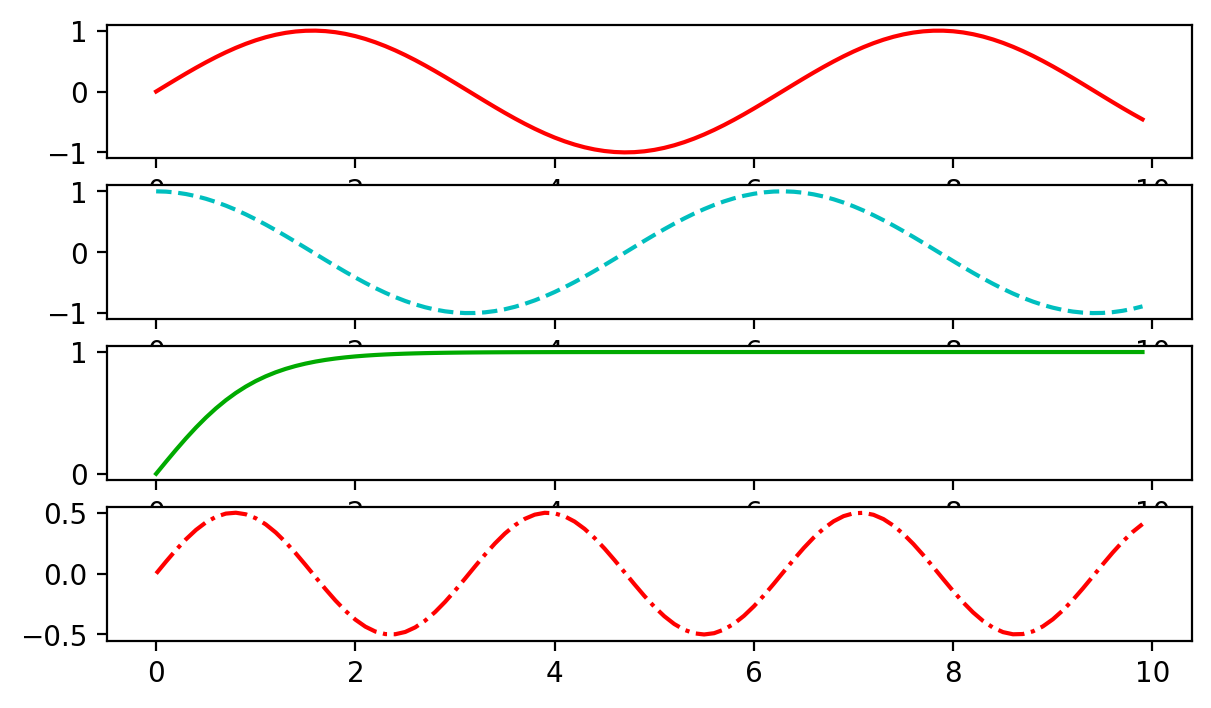

In [39]:
# 4행 1열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(4, 1, figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes):
    ax.plot(x, func[i](x), fmt[i])

## 1.4 다양한 그래프 그리기
### 1) pyplot 함수들 (교안 16page